In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import math
import scipy.stats as st
import statsmodels.api as sm

from functions66 import *

from datetime import datetime
from IPython.display import display
import warnings
#pd.set_option("display.max_rows", None)

In [2]:
notesO = pd.read_csv("notes.csv")
print(notesO.info())
print(notesO.columns)
# notesO["is_genuine"].replace([True, False], [0,1], inplace = True)   
#notesO.set_index("is_genuine", inplace= True)
notesO.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB
None
Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [3]:
notes= notesO[['diagonal', 'height_left', 'height_right', 'margin_low',  'margin_up', 'length']]

notes = notesO.drop('is_genuine', axis= 1)
notes.dropna(how= "any")
notes.head()
# notes: notesO enlevé de colonne is_genuine

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55


dataset clean enough to move forward directly to analysis
# Mission 0
Afin d'introduire votre analyse, effectuez une brève **description des données (analyses univariées et bivariées)**.

## Analyse univariée

In [4]:
# mesurer la tendance centrale 
notesO.groupby(by='is_genuine').mean().transpose()


is_genuine,False,True
diagonal,171.889857,171.9761
height_left,104.230429,103.9515
height_right,104.145571,103.7759
margin_low,5.281571,4.1435
margin_up,3.334571,3.0555
length,111.660714,113.2072


In [5]:
# mesurer la tendance centrale et dispersion 
notesO.groupby(by='is_genuine').median().transpose()

is_genuine,False,True
diagonal,171.875,172.005
height_left,104.215,103.915
height_right,104.170,103.760
margin_low,5.265,4.080
margin_up,3.335,3.070
length,111.765,113.210


In [6]:
# variance empirique 
# mesurer la dispersion 
notesO.groupby(by='is_genuine').var().transpose()

# => Variances pour variable margin_low et length sont surtout grands 

is_genuine,False,True
diagonal,0.088462,0.094852
height_left,0.045424,0.087764
height_right,0.064086,0.085501
margin_low,0.292515,0.098916
margin_up,0.034263,0.039096
length,0.458236,0.144762


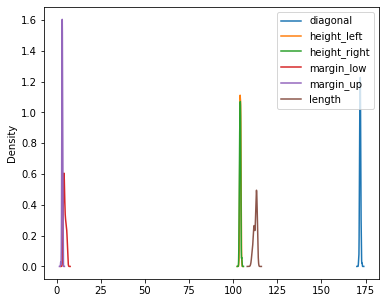

In [7]:
notesO.plot.kde(figsize=(6,5))
plt.savefig('univarie_kde_graphic.jpg')

### mesure de distribution de densité & mesure de forme - histogram+kde 

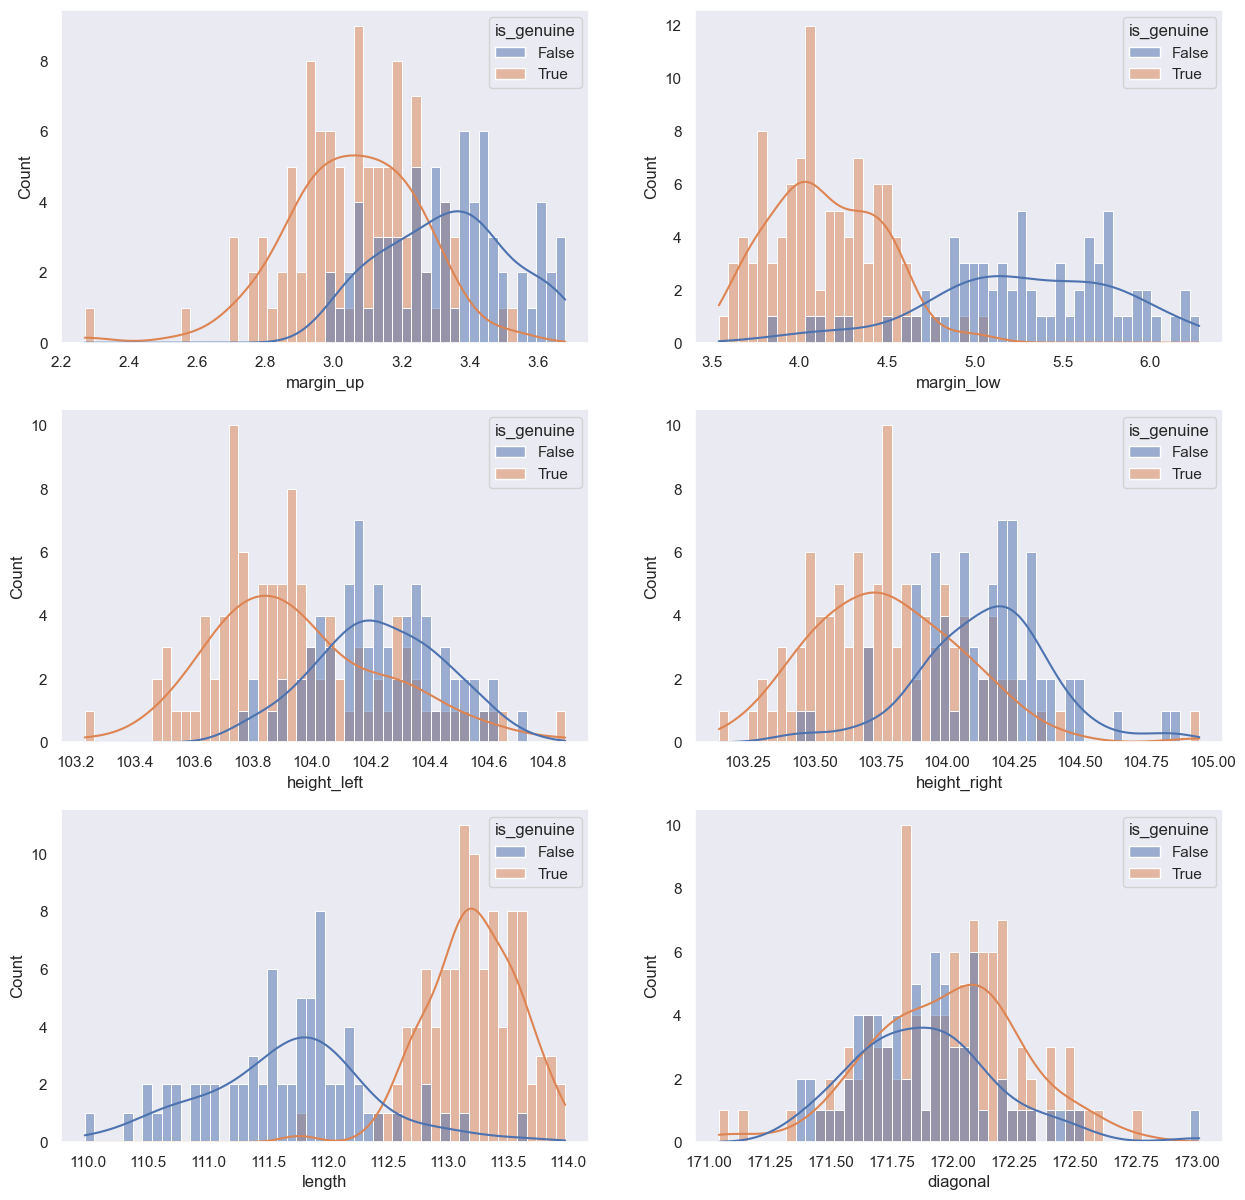

In [8]:


plt.figure(figsize=(15,15), dpi=100)
sns.set(style="dark")

plt.subplot(3,2,1)
sns.histplot(data=notesO, x="margin_up", hue="is_genuine",  bins=50, kde = True)

plt.subplot(3,2,2)
sns.histplot(data=notesO, x="margin_low", hue="is_genuine",  bins=50, kde = True)

plt.subplot(3,2,3)
sns.histplot(data=notesO, x="height_left",  hue="is_genuine", bins=50, kde = True)

plt.subplot(3,2,4)
sns.histplot(data=notesO, x="height_right", hue="is_genuine",  bins=50, kde = True)

plt.subplot(3,2,5)
sns.histplot(data=notesO, x="length",  hue="is_genuine", bins=50, kde = True)

plt.subplot(3,2,6)
sns.histplot(data=notesO, x="diagonal",  hue="is_genuine", bins=50, kde = True)

plt.savefig('uni_histograms_6variables.jpg')

#### as per the histograms above,  we see that in terms of density distribution, there're distinguishable difference between True and False tickets statistical data for 5 variables: length, margins, heights. 
#### For variable diagonal, there's no apparent different among True and False tickets. 

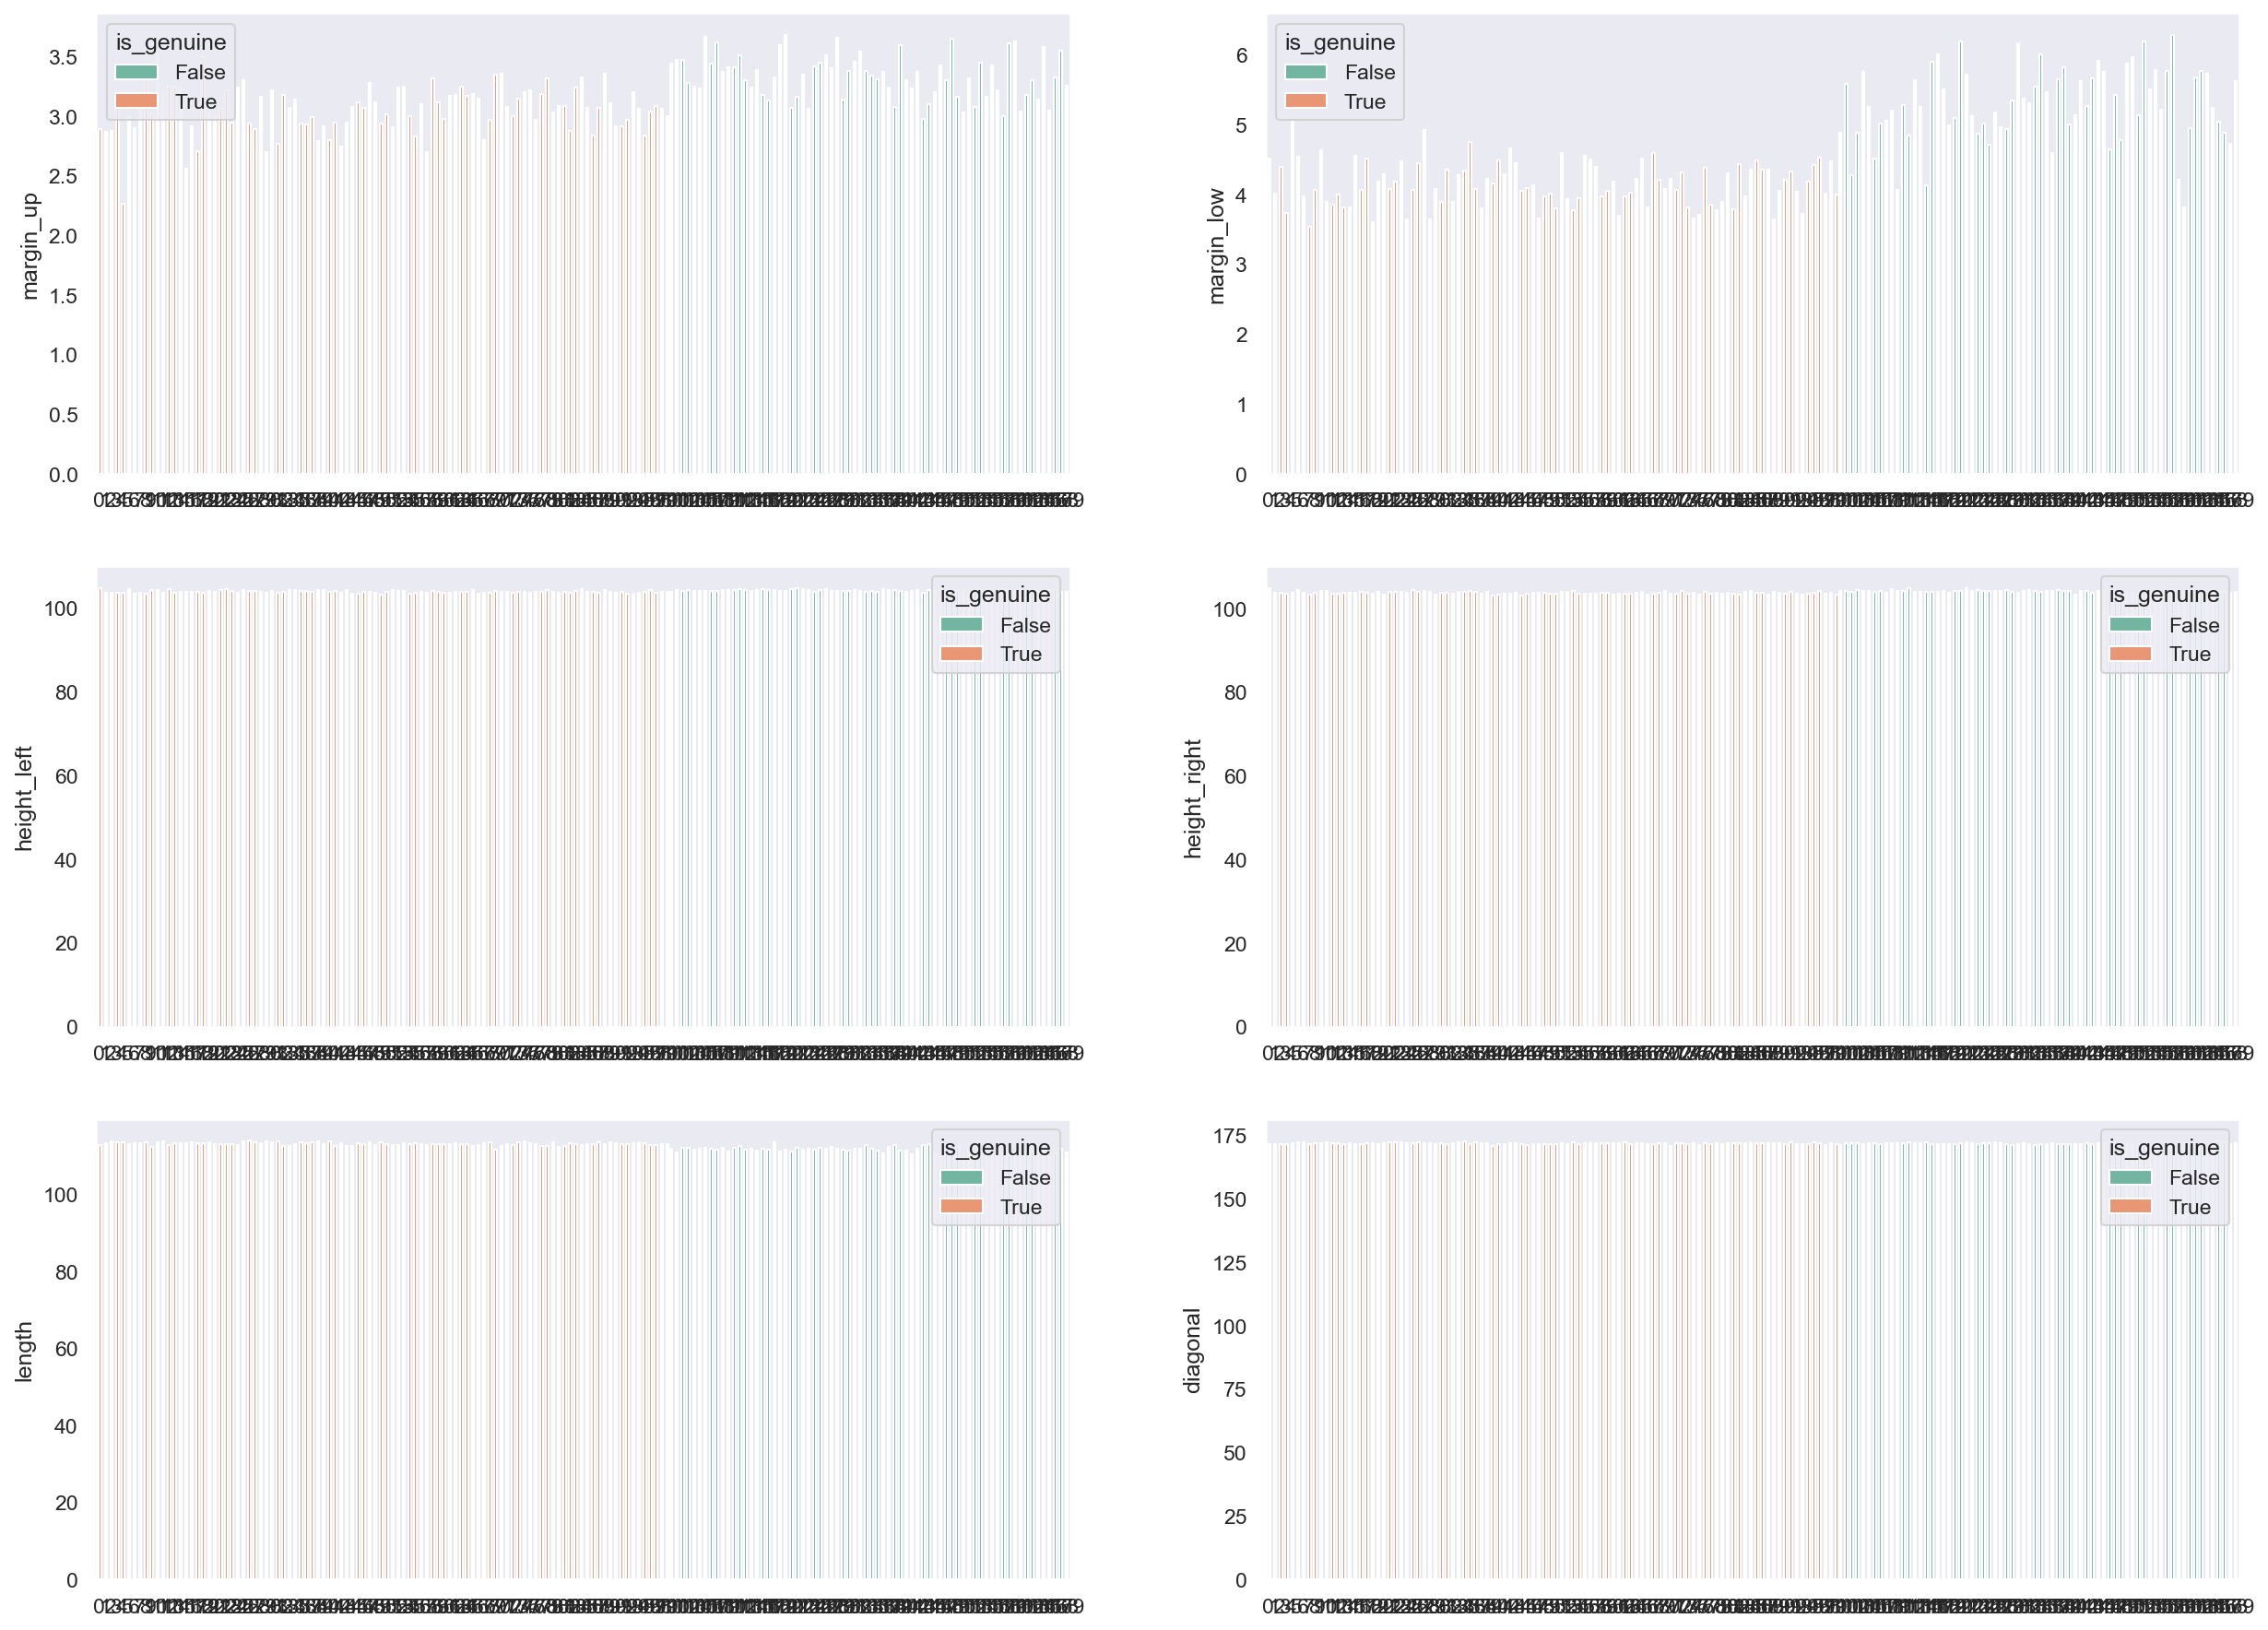

In [9]:
plt.figure(figsize= (20,15), dpi=150)
sns.set(style="dark")

plt.subplot(3,2,1)
#ax.set(ylim=(0, 6))
ax=sns.barplot(y="margin_up", hue= 'is_genuine', x= notesO.index,
                 data=notesO, palette="Set2")

plt.subplot(3,2,2)
#ax2.set(ylim=(0, 6))
ax=sns.barplot(y="margin_low", hue= 'is_genuine',x= notesO.index,
                 data=notesO, palette="Set2")

plt.subplot(3,2,3)
#ax3.set(ylim=(100, 110))
ax=sns.barplot(y="height_left", hue= 'is_genuine',x= notesO.index,
                 data=notesO, palette="Set2")

plt.subplot(3,2,4)
#ax4.set(ylim=(100, 110))
ax=sns.barplot(y="height_right",   hue= 'is_genuine',x= notesO.index,
                 data=notesO, palette="Set2")

plt.subplot(3,2,5)
#ax5.set(ylim=(100, 110))
ax=sns.barplot(y="length",   hue= 'is_genuine',x= notesO.index,
                 data=notesO, palette="Set2")

plt.subplot(3,2,6)
#ax6.set(ylim=(165, 175))
ax=sns.barplot(y="diagonal", hue= 'is_genuine',x= notesO.index,
               data=notesO, palette="Set2")

plt.savefig('uni_barplots_6variables.jpg')


### mesure de dispersion - quartiles, boxplot 

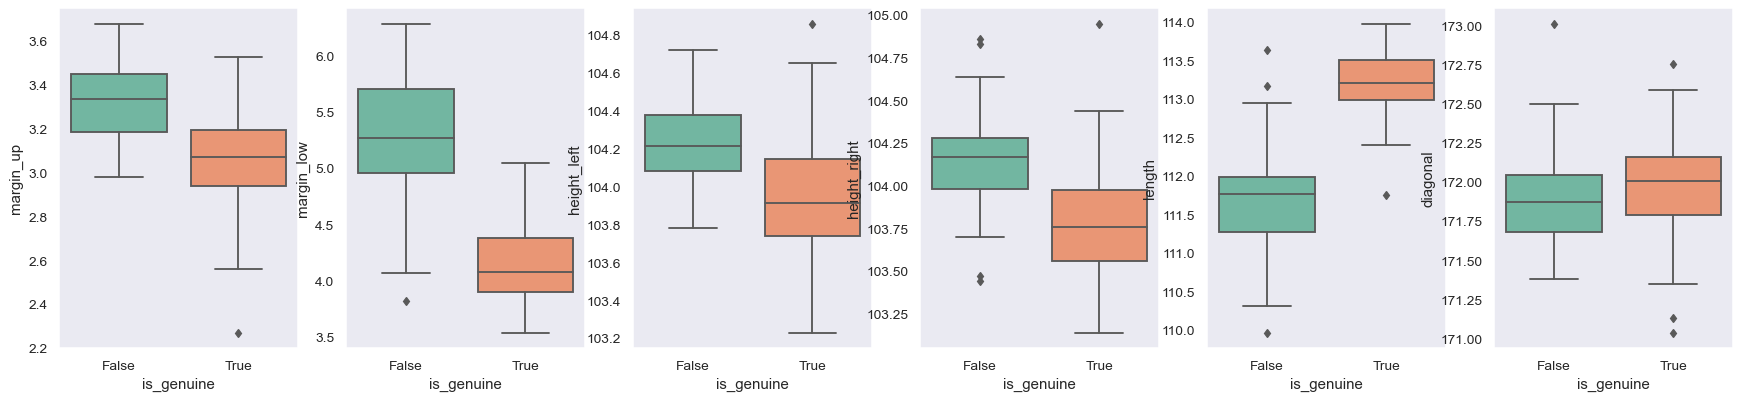

In [14]:
plt.figure(figsize= (24,5), dpi=90)
sns.set(style="dark")

plt.subplot(1,6,1)
ax=sns.boxplot(y="margin_up", x="is_genuine",
                 data=notesO, palette="Set2")

plt.subplot(1,6,2)
ax=sns.boxplot(y="margin_low", x="is_genuine",
                 data=notesO, palette="Set2")

plt.subplot(1,6,3)
ax=sns.boxplot(y="height_left", x="is_genuine",
                 data=notesO, palette="Set2")

plt.subplot(1,6,4)
ax=sns.boxplot(y="height_right", x="is_genuine",
                 data=notesO, palette="Set2")

plt.subplot(1,6,5)
ax=sns.boxplot(y="length", x="is_genuine",
                 data=notesO, palette="Set2")

plt.subplot(1,6,6)
ax=sns.boxplot(y="diagonal", x="is_genuine",
                 data=notesO, palette="Set2")

plt.savefig('univarie_boxplot_6variables.jpg')

#### According to boxplots , we see that there is NO evident difference for real and fake tickets in terms of diagonal (Q1,median, Q3); but for other 5 variables we see distionguishable differences

## Analyse bivariée 
- pairplot afin d'illustrer comment ces 6 variables se varient l'une en fonction de l'autre


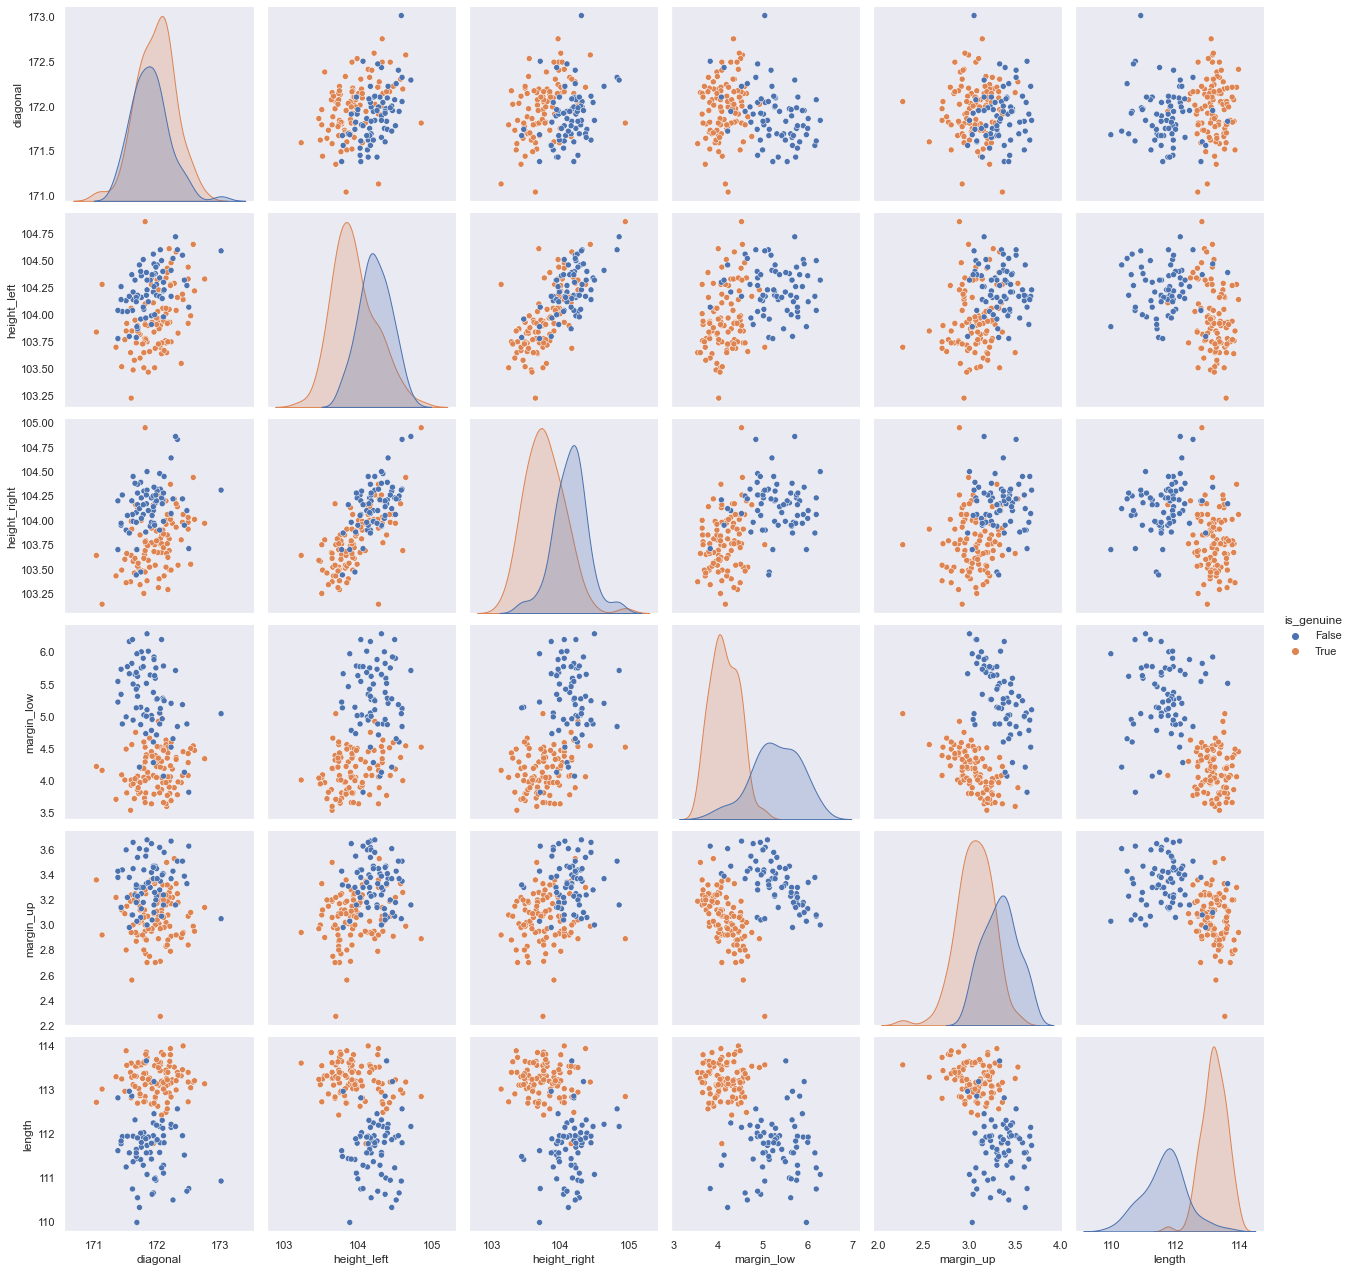

In [15]:
sns_pairplot = sns.pairplot(notesO, hue = "is_genuine", height=3)
plt.savefig('bi_pairplot_6variables.jpg')


#### Scatter plots: 
- Les individus True et False de classification is_genuine se regroupent en 2 partitions sur tous ces 6 variables 

#### Histogrammes: 
- Globalement la distribution des valeurs de ces 6 variables suivent **la loi normale**
- Grand écart au sujet de la distribution des individus False/True pour ces 6 variables
- pour la répartition de data de chaque variable, on constate qu'il existe une différence évidente entre billets True et False en terme de **length** : billets True ont généralement des **length** plus longues que billets False , et billets True sont moins élevés en terme de **margin_low** 



#### Apart from height_left & height_right, linear regression is not applicable for all the other variables 

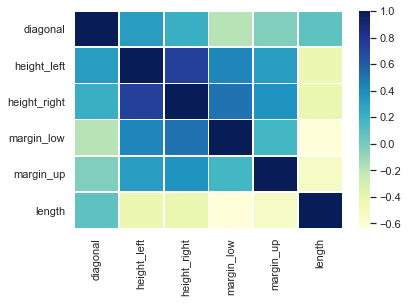

In [18]:
sns.heatmap(notes.corr(),linewidths=.5, cmap="YlGnBu")
plt.savefig('bi_heatmap_6var.jpg')

In [19]:
#sns.heatmap(notes.corr())


### Constatation: 

- height_left vs height_right : 70%
- margin_low vs height_right : 50%
- margin_up vs heights : 30%
- length vs heights: - 40% 
- margin_up vs length : - 50%
- margin_low vs length : - 60%
- diagonal vs others: -10% – 30%

### En résume, Analyse univariée & bivariée : 

Ne permettent pas à décortiquer la **variabilité entre les individus** ni les **liaisons entre les variables**, ainsi n’arrivent pas à nous sortir des conclusions concrètes pour le but. 
=> il faut creuser dans le détail à l’appui d’autres méthodes statistiquement plus solides et avancées à ce titre: ACP, classification des individus … 


# Mission 1  PCA / ACP
- analyse de l'**éboulis des valeurs propres** ;
- représentation des **variables par le cercle des corrélations** ;
- représentation des **individus par les plans factoriels** ;
- analyser de la qualité de **représentation** et la **contribution** des individus.(https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees/5280031-representez-les-individus-sur-les-plans-factoriels)

Pour chacune de ces étapes, commentez les résultats obtenus. 
La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative. : is_genuine shall be used as hue 


In [20]:
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA


In [21]:
# préparation de dataframe -- configurer 'is_genuine' comme le classificateur

notesO.set_index('is_genuine', inplace =True)
notesO.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.67,103.74,103.70,4.01,2.87,113.29
True,171.83,103.76,103.76,4.40,2.88,113.84
True,171.80,103.78,103.65,3.73,3.12,113.63
True,172.05,103.70,103.75,5.04,2.27,113.55


In [22]:
# choix du nombre de composantes à calculer
n_comp = 6

X = notesO.values
names = notesO.index                # ou data.index pour avoir les intitulés  
features = notesO.columns         # = variables 

print(names)
print(features)

Index([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
       ...
       False, False, False, False, False, False, False, False, False, False],
      dtype='object', name='is_genuine', length=170)
Index(['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up',
       'length'],
      dtype='object')


In [23]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

In [24]:
def display_facto(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
     for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) *1.1
            plt.xlim((-6,6))
            plt.ylim((-6,6))

            # définition des limites du graphique
            
     
            #plt.plot.xlim((0,10))
            #plt.plot.ylim((0, 10))
        
            # affichage des lignes horizontales et verticales
            plt.plot([-6, 6], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-6, 6], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


In [25]:
from functions66 import *

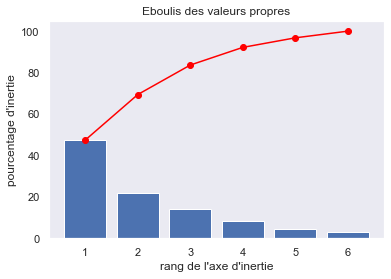

<Figure size 432x288 with 0 Axes>

In [26]:
# Eboulis des valeurs propres
display_scree_plot(pca)
plt.savefig('P6M1_screeplot_eboulis.jpg')

Les 2 premiers facteurs (le 1er plan factoriel) représentent environ 70% de l’inertie . Les 4 premiers facteurs (les 2 premiers plans factoriels) représentent environ 90% de l’inertie. => c'est bien propre de prendre les 4 ou 2 premiers facteurs


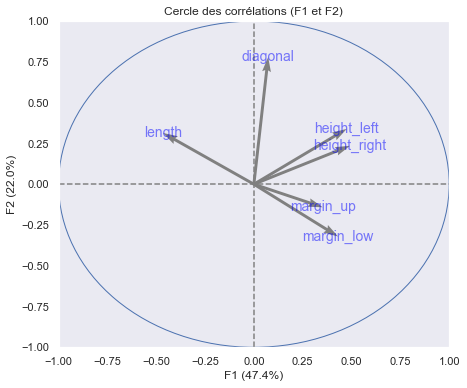

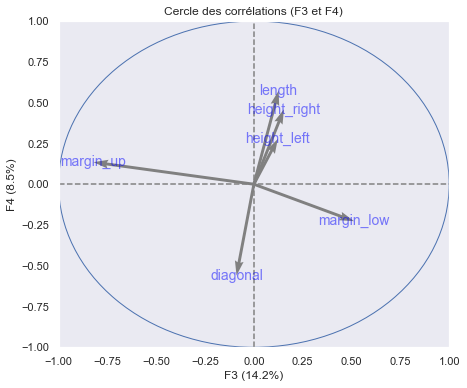

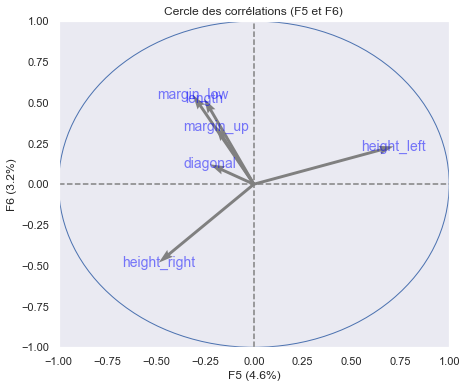

<Figure size 432x288 with 0 Axes>

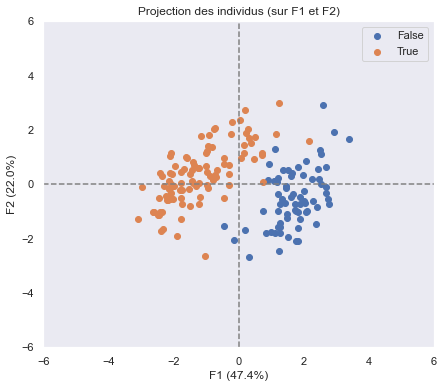

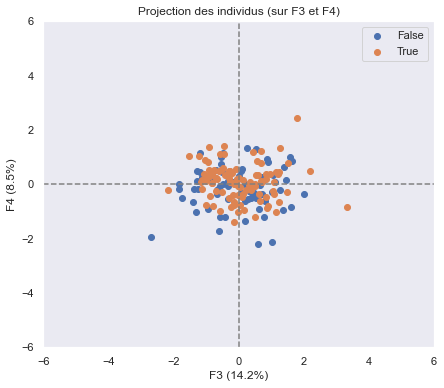

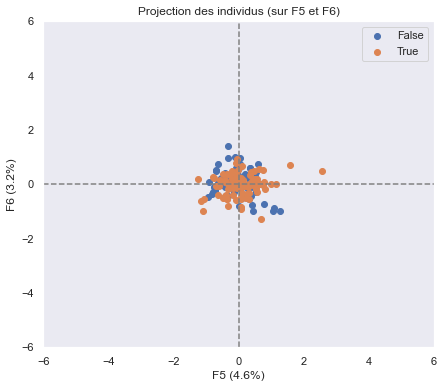

<Figure size 432x288 with 0 Axes>

In [27]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1), (2,3),(4,5)], labels = np.array(features))
plt.savefig('P6M1_cercle correlation.jpg')

# projection des individus sur 1er plan factoriel
X_projected = pca.transform(X_scaled) 
display_facto(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var=np.array(names))
plt.savefig('P6M1_Projection individus.jpg')

### Constatation : 
longueur - qualité de représentation , angle - corrélation
- le 1er plan représente globalement les 6 variables
- diagonal est quasiment superposé avec F2 au sens positif, et longue flèche => bien représenté par 1er plan factoriel
- sur le 1er et 2ème plan, height_left et height_right se corrèlent bien vu l’angle entre eux
- margin_up flèche longue et petit angle avec F3 au sens négatif =>  bien représenté par F3 au sens négatif 


In [28]:
# individus projectés sur plan factoriel

#nombre d'observations
n = notes.shape[0]
#nombre de variables
p = notes.shape[1]
p

6

In [29]:
#scikit-learn
import sklearn
#vérification de la version
print(sklearn.__version__) 

0.24.1


### On doit tout d'abord calculer la contribution de l'intertie totale

In [30]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler

#instanciation
sc = StandardScaler()

#transformation –  centrage-réduction
Z = sc.fit_transform(notes)

Z         # Z is the scaled and transformed

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [31]:
#moyenne
print(np.mean(Z,axis=0))

[ 7.69580478e-15  3.14728635e-14  3.61958829e-14  7.52339367e-16
 -1.50467873e-15 -1.37510918e-14]


In [32]:
#Il faut instancier l’objet PCA dans un premier temps, nous affichons ses propriétés.
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
acp

PCA(svd_solver='full')

In [33]:
#calculs
coord = acp.fit_transform(Z)

#nombre de composantes calculées
print(acp.n_components_)

6


In [34]:
#variance expliquée
print(acp.explained_variance_)

[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]


In [35]:
# valeur corrigée  # valeur propre
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[2.84687523 1.31742636 0.85407146 0.51157773 0.27676935 0.19327987]


In [36]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[2.84687523 1.31742636 0.85407146 0.51157773 0.27676935 0.19327987]


In [37]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


La première composante accapare 47% de l’information disponible. Il y a un fort ‘’effet
taille’’ dans nos données. Nous disposons de 70% avec les 2 premiers facteurs, 84% avec les 3 premiers facteurs et 90% avec les 4 premiers. Les suivants semblent anecdotiques.

Nous disposons des éléments permettant de construire le graphique ‘’**Scree plot’’ (éboulis des
valeurs propres)**

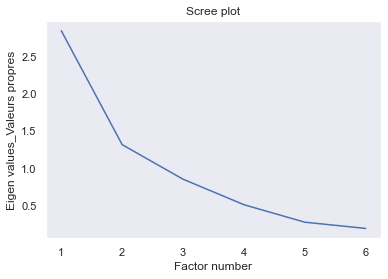

<Figure size 432x288 with 0 Axes>

In [38]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values_Valeurs propres")
plt.xlabel("Factor number")
plt.show()
plt.savefig("M1_screeplot_valeur propres.jpg")

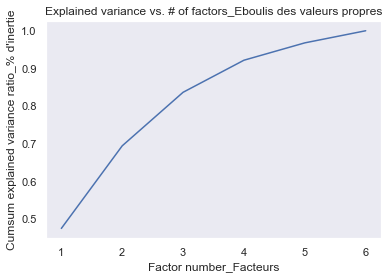

<Figure size 432x288 with 0 Axes>

In [39]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors_Eboulis des valeurs propres")
plt.ylabel("Cumsum explained variance ratio_% d'inertie")
plt.xlabel("Factor number_Facteurs")
plt.show()
plt.savefig("M1_screeplot_Eboulisvaleurspropres.jpg")

#### => les 4 premiers facteurs expliquent 90% des valeurs propres, donc à l'idéal on peut prendre les 4 premières composantes. 

In [40]:
notesO.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.67,103.74,103.70,4.01,2.87,113.29
True,171.83,103.76,103.76,4.40,2.88,113.84
True,171.80,103.78,103.65,3.73,3.12,113.63
True,172.05,103.70,103.75,5.04,2.27,113.55


### Contribution des individus dans l'inertie totale

In [41]:
di = np.sum(Z**2,axis=1)

ctri_inertie = pd.DataFrame({'genuine':notesO.index,'d_i':di})
ctri_inertie.sort_values(by='d_i', ascending= False)

,genuine,d_i
166,False,20.625650
0,True,18.410598
4,True,18.039567
122,False,16.790944
39,True,15.052608
...,...,...
59,True,1.484454
76,True,1.435202
85,True,1.431664
98,True,0.878319


### M1.4.1 Qualité de représentation des individus aux axes (COS2)


In [42]:
cos2 = coord**2
print(cos2.shape)

for j in range(p):
      cos2[:,j] = cos2[:,j]/di
        
repres= pd.DataFrame({'genuine':notesO.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})
repres

#comme ça, Les COS² pour les 2 premiers facteurs sont affichés

(170, 6)


,genuine,COS2_1,COS2_2
0,True,0.251929,0.139000
1,True,0.818002,0.050822
2,True,0.784862,0.000466
3,True,0.882856,0.001652
4,True,0.320145,0.009417
...,...,...,...
165,False,0.800651,0.004703
166,False,0.324059,0.411824
167,False,0.498809,0.083461
168,False,0.156908,0.271800


In [44]:
#cos2  #cos2 pour les 6 facteurs 

Conformément à la théorie de projection, pour chaque individu, la somme des COS² sur l’ensemble des facteurs est égale à 1.


In [45]:
#vérifions la théorie - somme des cos2 de chaque ligne = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


### M1.4.2 Contribution des individus aux axes (CTR)
Elles permettent de déterminer les individus qui pèsent le plus dans la définition de chaque facteur.

In [46]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

ctr_axes= pd.DataFrame({'genuine': notesO.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})     
# ici on prends axe 1 et 2 

ctr_axes.sort_values(by="CTR_1", ascending= False ).head()
# les 5 individus qui contributent le plus aux CTR_1

,genuine,CTR_1,CTR_2
122,False,0.023758,0.012372
49,True,0.019620,0.007487
29,True,0.018089,0.000038
112,False,0.017950,0.016259
158,False,0.015836,0.002423


Conformément à la théorie, pour chaque axe, la somme des contributions des individus sur cette axe est égale à 1.

In [47]:
#vérifions la théorie
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


### M1.5.1 Corrélation variables vs facteurs

In [48]:
# racine carrée des valeurs propres / square root 
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables vs facteurs
pd.DataFrame(corvar)

,0,1,2,3,4,5
0,0.123635,0.894863,-0.082152,-0.400346,-0.118420,0.053709
1,0.802300,0.389389,0.113450,0.198872,0.376638,0.102053
2,0.829835,0.270354,0.142164,0.328254,-0.256201,-0.211383
3,0.727258,-0.367910,0.473916,-0.162023,-0.164091,0.240758
4,0.594829,-0.161976,-0.758873,0.096801,-0.102031,0.155798
5,-0.785209,0.361022,0.117288,0.410339,-0.133846,0.230348


In [49]:
#on affiche pour les 2 premiers axes
Cor = pd.DataFrame({'id':notes.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})
Cor

,id,COR_1,COR_2
0,diagonal,0.123635,0.894863
1,height_left,0.802300,0.389389
2,height_right,0.829835,0.270354
3,margin_low,0.727258,-0.367910
4,margin_up,0.594829,-0.161976
5,length,-0.785209,0.361022


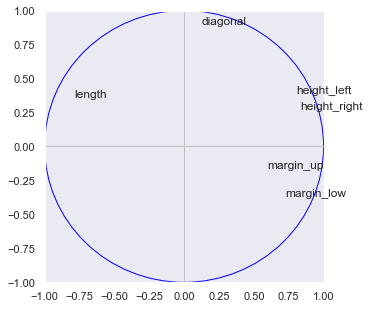

<Figure size 432x288 with 0 Axes>

In [50]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(notes.columns[j],(corvar[j,0],corvar[j,1]))     #Contribution des variables pour les 2 premiers axes-facteurs

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()
plt.savefig('M1_cercle_quality_projection_6variables.jpg')

#### Visuellement on observe que: 
- 4 variables (height_left, height_right, margin_up, margin_low) sont positivement corrélées avec F1 avec des coeff de corrélation élevés; 
- diagonal n'est pas bien corrélé avec F1, mais bien corrélé avec F2 au sens positif (0.89);
- length négativement corrélé avec F1 à un coeff - 0.78

Tous ces constatation se résonnent avec le cercle des corrélations de la partie ACP ci-dessus. 
#### Pour avoir un support précis, on va creuser sur la qualité de représentation à travers COS2 ci-après:

### M1.5.2 Qualité de représentation des variables (COS²)

In [51]:
#cosinus carré des variables sur F1 et F2
cos2var = corvar**2
print(cos2var.shape)
repres_variables = pd.DataFrame({'id':notes.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]})
repres_variables['COS2_1+2'] = repres_variables['COS2_1'] + repres_variables['COS2_2']
repres_variables


(6, 6)


,id,COS2_1,COS2_2,COS2_1+2
0,diagonal,0.015286,0.800781,0.816066
1,height_left,0.643685,0.151624,0.795308
2,height_right,0.688626,0.073091,0.761717
3,margin_low,0.528904,0.135358,0.664262
4,margin_up,0.353822,0.026236,0.380058
5,length,0.616553,0.130337,0.746890


In [52]:
#verification qualité repésentation des variables sur facteurs
print(np.sum(cos2var,axis=1)) 


[1. 1. 1. 1. 1. 1.]


La somme des COS² sur toutes les componentes sont égales à 1 (la somme des COS² d’une variable sur l’ensemble des facteurs est égale à 1)

### Constatation: 
- F1 représente bien 5 variables sauf diagonal 
- F2 représente bien diagonal 
- F1+F2 représente dans son ensemble bien ces 6 variables

### M1.5.3 Contribution des variables aux axes (CTR)

La contribution est également basée sur le carré de la corrélation, mais relativisée par l’importance de l’axe 

In [53]:
#contributions
ctrvar = cos2var

for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
    
# ici on n'affiche que pour les deux premiers axes
contri_variables= pd.DataFrame({'id':notes.columns,'CTR_F1':ctrvar[:,0],'CTR_2':ctrvar[:,1]})
contri_variables

,id,CTR_F1,CTR_2
0,diagonal,0.005369,0.607837
1,height_left,0.226102,0.115091
2,height_right,0.241888,0.055480
3,margin_low,0.185784,0.102744
4,margin_up,0.124284,0.019915
5,length,0.216572,0.098933


In [54]:
#verification contributions des variables aux axes 
print(np.sum(ctrvar,axis=0))

print(np.sum(contri_variables,axis=0))

[1. 1. 1. 1. 1. 1.]
id        diagonalheight_leftheight_rightmargin_lowmargi...
CTR_F1                                                  1.0
CTR_2                                                   1.0
dtype: object


Conformément à la théorie, pour chaque axe, la somme des contributions de tous ces 6 variables sur chaque axe est égale à 1.

# Mission 2
Appliquez un **algorithme de classification**, puis analysez le résultat obtenu.

Visualisez la partition (cluster) obtenue dans le 1er plan factoriel de l'ACP, puis analysez-la


In [55]:
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.decomposition import PCA

#from scipy.cluster.hierarchy import linkage, fcluster


## Partitionnement avec méthode K-means

On sait déjà le nombre de clusters à sortir est 2, et que K-means qui requiert qu'on spécifie le nombre de clusters au départ, est une méthode efficace avec laquelle on peut partionner les données à grande échelle, surtout elle est bien liée avec ACP, donc ici dans ce cas on opte pour K-means par rapport aux autres méthodes telle que classification hiérarchique. 

In [56]:
notesO.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.67,103.74,103.70,4.01,2.87,113.29
True,171.83,103.76,103.76,4.40,2.88,113.84
True,171.80,103.78,103.65,3.73,3.12,113.63
True,172.05,103.70,103.75,5.04,2.27,113.55


In [57]:
# Nombre de clusters souhaités
n_clust = 2

# préparation des données pour le clustering
X = notesO.values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
#X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)     # centrage
X_scaled = std_scale.transform(X)                 # reduction


# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=n_comp).fit(X_scaled)
X_projected = pca.transform(X_scaled)   
X_projected

array([[ 2.15363875,  1.59970945,  1.78745079,  2.43346523,  0.69968952,
        -1.26770217],
       [-2.11041589, -0.52603892,  0.54256277,  0.34454951,  0.0674404 ,
        -0.54460079],
       [-1.97315242, -0.04810178,  0.85871563,  0.37481231, -0.4248861 ,
         0.08048667],
       ...,
       [ 2.06724502,  0.84560244, -0.61028227, -1.71417169,  0.1169579 ,
        -0.50433787],
       [ 0.73925685, -0.97296457, -1.35977212, -0.19173617, -0.24355701,
         0.21142914],
       [ 1.50499242, -1.07972486,  0.18888855, -1.34755225, -0.2891493 ,
        -0.06034599]])

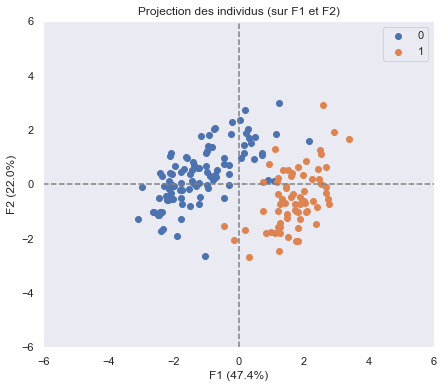

<Figure size 432x288 with 0 Axes>

In [58]:
from functions66 import *
display_facto(X_projected, n_comp, pca, [(0,1)],  illustrative_var= np.array(clusters))
plt.show()
plt.savefig("M2_Kmeans_projection_individus.jpg")

In [59]:
from numpy import asarray
from numpy import savetxt

centroids = km.cluster_centers_                             #calculer les centroides des clusters

# Centrage et Réduction
std_scaleC = preprocessing.StandardScaler().fit(centroids)     # centrage
C_scaled = std_scaleC.transform(centroids)   

centroids_projected = pca.transform(C_scaled)     # vu qu'on a pris 6 componentes, donc on voit ici les centroids_projected de 2 clusters sur 6 facteurs


savetxt("centroids.csv", centroids, delimiter=',' )      #exporter sous forme .CSV

print(centroids.shape)       
print(centroids_projected)
centroidsDF= pd.DataFrame(centroids_projected)
centroidsDF=centroidsDF.rename({0:"F1", 1:"F2", 2: "F3", 3:"F4", 4:"F5", 5:"F6"}, axis=1)
centroidsDF

(2, 6)
[[-2.14298789  0.98103955  0.06977011 -0.63182459 -0.20258858 -0.00721091]
 [ 2.14298789 -0.98103955 -0.06977011  0.63182459  0.20258858  0.00721091]]


,F1,F2,F3,F4,F5,F6
0,-2.142988,0.98104,0.06977,-0.631825,-0.202589,-0.007211
1,2.142988,-0.98104,-0.06977,0.631825,0.202589,0.007211


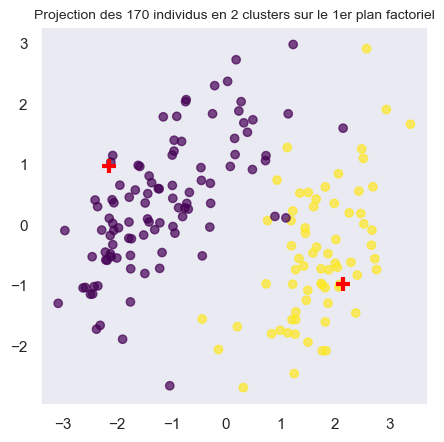

<Figure size 432x288 with 0 Axes>

In [61]:
# Projection des individus (y compris les centroides de partitions) sur le 1er plan factoriel -- pareil avec la projection ci-dessus
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(float), cmap= 'viridis',alpha=0.7)  
plt.scatter(centroids_projected[:,0], centroids_projected[:,1], color='red', s=100, marker="+", lw=3, alpha=1)

plt.title("Projection des {} individus en 2 clusters sur le 1er plan factoriel".format(X_projected.shape[0]), fontsize=10)
plt.show()
plt.savefig('M2_2 clusters on plan1.jpg')


### Constatation: 
- Sur le 1er plan factoriel, les 2 clusters-partitions se distinguent clairement.
- Vu que le 1er plan représente environ **70%** d'inertie et la plupart des variables ( diagonal, length, height_left, height_left, margin_low) y projetent de bonne qualité (COS2), on dirait que **cette projection des clusters sur 1er plan a du sens** et on pourrait y faire confiance. 

<font color="#5467FF"> A noter que la différence entre cette projection et l'ancienne (True, False) consiste à celle-ci est basé sur le résultat de clustering de méthode K-means, alors que la projection au début dans Mission1 est faite directement sur les plans factoriels sans intégrer préalablement le clustering (partitionnement) des individus , même si on voit 2 classes (True/False) qui sont indiqués sur data originale. </font>

In [62]:

print('Matrice de confusion')
result = pd.crosstab(clusters, notesO.index)
result.index = ["cluster1", "cluster2"]
result

Matrice de confusion


col_0,False,True
cluster1,2,99
cluster2,68,1


### Constatation: 
- 2 faux billets sont classés dans cluster 2 qui représente globalement billets vrais (99/101)
- 1 vrai billet est classé dans cluster 1 qui représente globalement billets faux (68/69)

**taux d'erreur = 3/170 = 1.76%**

On sait qu'il existe 100 vrais billets et 70 faux, donc on en conclut que cette K-means clustering qu'on a appliqué est globalement bonne pour ce cas

# Mission 3
Modélisez les données à l'aide d'une **régression logistique**. Grâce à celle-ci, vous créerez un **programme (algorithme de classification)** capable d'effectuer une prédiction sur un billet, c'est-à-dire de déterminer s'il s'agit d'un vrai ou d'un faux billet. 
Pour chaque billet, votre algorithme de classification devra donner la ***probabilité** que le billet soit vrai. Si cette probabilité est supérieure ou égale à 0.5, le billet sera considéré comme vrai. Dans le cas contraire, il sera considéré comme faux

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics

### Visualisez le nuage de points

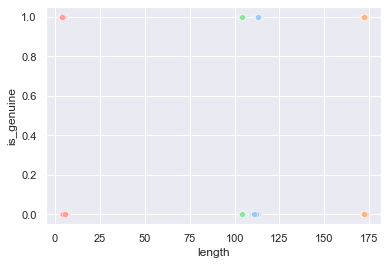

In [65]:
sns.set_theme(style="darkgrid", palette="pastel")

ax = sns.scatterplot(x="length", y="is_genuine", data=notesO)
ax = sns.scatterplot(x="diagonal", y="is_genuine", data=notesO)
ax = sns.scatterplot(x="height_left", y="is_genuine", data=notesO)
ax = sns.scatterplot(x="margin_low", y="is_genuine", data=notesO)
plt.show()

Il y a des 0 et des 1, mais il est ici difficile de dire si l'on est plus ou moins Vrai en fonction de ces variables.

Selon le scatterplot ci-dessus, on voit qu'une **régression linéaire sur un tel nuage de points n'aurait pas de sens** vu y n'est pas quantitative mais boolean.  
Rég linaire : X: quantitative/time series  Y: quantitative 

Y dépendante est variable **qualitative binaire** (soit 0 ou 1, existe ou existe pas, oui ou non, true ou false) ; X explicative sont de **multiples** variables **quantitatives** , => rég logistique 

## Régression logistique
Effectuons donc une régression logistique de is_genuine en fonction de 6 variables :

In [66]:
notesO = notesO.reset_index()
notesO.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [67]:
from sklearn.linear_model import LogisticRegression 


In [68]:
# définir X et y
notes= notesO.drop(['is_genuine'], axis=1)                                      # dataframe notesO avec colonne [is_genuine] enlevé 
X = notes.values   
X                    
# variables pour rég logistique: X valeurs regroupent ['diagonal', 'height_left', 'height_right', 'margin_low','margin_up', 'length']

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.67, 103.74, 103.7 ,   4.01,   2.87, 113.29],
       [171.83, 103.76, 103.76,   4.4 ,   2.88, 113.84],
       ...,
       [172.47, 104.27, 104.1 ,   4.88,   3.33, 110.68],
       [171.82, 103.97, 103.88,   4.73,   3.55, 111.87],
       [171.96, 104.  , 103.95,   5.63,   3.26, 110.96]])

In [69]:
#notesO["is_genuine"].replace([True, False], [0,1], inplace = True)       # replace True by 0, False by 1
y = notesO["is_genuine"]
y


0       True
1       True
2       True
3       True
4       True
       ...  
165    False
166    False
167    False
168    False
169    False
Name: is_genuine, Length: 170, dtype: bool

In [70]:
model = LogisticRegression()
model.fit(X,y)                          # entrainer le model avec méthode fit

probabilities= model.predict_proba(X)
probabilities


# this trained the whole dataset , that's why your genuine function has result 1 or 0 

array([[3.62892778e-01, 6.37107222e-01],
       [6.23323622e-03, 9.93766764e-01],
       [6.40268733e-03, 9.93597313e-01],
       [1.97000004e-03, 9.98030000e-01],
       [3.02644603e-02, 9.69735540e-01],
       [1.87932261e-01, 8.12067739e-01],
       [7.35951380e-03, 9.92640486e-01],
       [1.42519095e-03, 9.98574809e-01],
       [8.62385983e-03, 9.91376140e-01],
       [4.47028734e-01, 5.52971266e-01],
       [2.18826056e-02, 9.78117394e-01],
       [2.13994681e-03, 9.97860053e-01],
       [4.85277259e-02, 9.51472274e-01],
       [6.18280508e-03, 9.93817195e-01],
       [6.48319310e-03, 9.93516807e-01],
       [2.46391540e-02, 9.75360846e-01],
       [8.23994303e-03, 9.91760057e-01],
       [2.06189722e-02, 9.79381028e-01],
       [6.13729324e-03, 9.93862707e-01],
       [1.32074763e-02, 9.86792524e-01],
       [2.35721662e-02, 9.76427834e-01],
       [3.63144427e-02, 9.63685557e-01],
       [5.00806591e-02, 9.49919341e-01],
       [7.72770477e-02, 9.22722952e-01],
       [1.250387

In [71]:
model.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [72]:
model.coef_    # les coeff de 6 variables de notre équation

array([[-0.37117129, -0.57990484, -1.04335572, -2.83568573, -1.50981796,
         2.2320178 ]])

In [73]:
model.intercept_  # coeff supplémentaire 


array([-0.01511989])

In [74]:
notesO['predict'] = model.predict(X)
#notesO.reset_index(inplace=True)
notesO.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,predict
0,True,171.81,104.86,104.95,4.52,2.89,112.83,True
1,True,171.67,103.74,103.70,4.01,2.87,113.29,True
2,True,171.83,103.76,103.76,4.40,2.88,113.84,True
3,True,171.80,103.78,103.65,3.73,3.12,113.63,True
4,True,172.05,103.70,103.75,5.04,2.27,113.55,True


In [75]:
pd.crosstab(notesO['is_genuine'], notesO['predict'])

predict,False,True
is_genuine,,
False,69,1
True,1,99


In [76]:
print("2/170 individus sont mal placés dans cette matrice, donc le taux d'erreur est 2/170 = ", 
     round(2/170, 3))

2/170 individus sont mal placés dans cette matrice, donc le taux d'erreur est 2/170 =  0.012


In [77]:
from sklearn.metrics import accuracy_score
print("accuracy score of model:", round(accuracy_score(notesO['is_genuine'], notesO['predict']), 4))

accuracy score of model: 0.9882


performance du model > 98%,  donc on pourrait dire que c'est un bon modèle pour la prédiction (ctd. on peut utiliser la régression logistique dans notre cas).

### Step1: Split de jeu de données 

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.2, random_state= 42)    # random_state = an int: Using an int will produce the same results across different calls

print("Training features/target:", X_train.shape, y_train.shape)
print("Testing features/target:", X_test.shape, y_test.shape)


Training features/target: (136, 6) (136,)
Testing features/target: (34, 6) (34,)


20% de jeu de données (test_size=0.2) sont pour le test, ctd. 80% pour l'entrainement de modèle 

### Step2: Entrainement et test  

In [79]:
logmodel = LogisticRegression(penalty='l2', C=0.1)
logmodel.fit(X_train, y_train)                                         # entrainer logmodel avec train data. méthode fit()

y_pred = logmodel.predict(X_test)                               #prédire y avec X_test
y_pred_proba = logmodel.predict_proba(X_test)[:,1]
print(y_pred)
print(y_pred_proba)

[False  True False  True  True False False  True False  True  True False
 False  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False False]
[0.33594127 0.90845957 0.17123617 0.94907963 0.51048101 0.08320533
 0.08158139 0.64355655 0.21567112 0.87443503 0.84427186 0.0341644
 0.12535959 0.90828093 0.90996754 0.80286655 0.87739293 0.22959598
 0.93660081 0.20127935 0.88411373 0.90108791 0.9218185  0.91832902
 0.79072304 0.52547777 0.88955242 0.7641907  0.7799006  0.87169093
 0.84689114 0.77615766 0.24361405 0.23722808]


### Step3: Mesurer le niveau de précision de logmodel 

In [80]:
print("Accuracy score of logmodel for test data: ", 
      round(metrics.accuracy_score(y_test, y_pred), 4))

# ici y_test est dataset existant de y pour test, y_pred est le y prédit par logmodel via x_test

Accuracy score of logmodel for test data:  0.9706


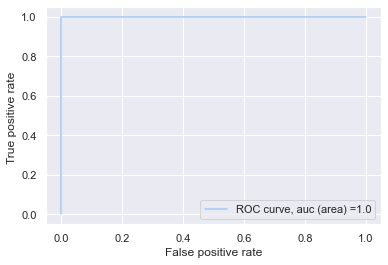

In [81]:
# pour les test data

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba) 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="ROC curve, auc (area) ="+str(auc))
plt.legend(loc=4)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate ')
plt.show()

# fpr: false positive rate
# tpr: true positive rate 
# auc : 

#### AUC is 1, it means there is a 100% chance that the model will be able to distinguish between positive class and negative class.


## Step4: Aller plus loin, optimisation de choix de variables 


In [82]:

from sklearn.feature_selection import RFE

selector = RFE(logmodel, step=1)                                   #recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features
selector = selector.fit(X_train, y_train)
selector.support_ 


array([False, False,  True,  True, False,  True])

In [83]:
print("Selon selector, ces variables sont choisies pour la prise de décision False/True: ",  np.array(notes.columns)[[2,3,-1]])

Selon selector, ces variables sont choisies pour la prise de décision False/True:  ['height_right' 'margin_low' 'length']


In [84]:
print(selector.predict(X_test))

print("proba False I  proba True: ")
print(selector.predict_proba(X_test))

[False  True False  True False False False  True False  True  True False
 False  True  True  True  True False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False False]
proba False I  proba True: 
[[0.71481126 0.28518874]
 [0.09752728 0.90247272]
 [0.77331092 0.22668908]
 [0.06721685 0.93278315]
 [0.57902677 0.42097323]
 [0.90924935 0.09075065]
 [0.87875875 0.12124125]
 [0.36366657 0.63633343]
 [0.77743605 0.22256395]
 [0.13396707 0.86603293]
 [0.23831493 0.76168507]
 [0.96757944 0.03242056]
 [0.87090387 0.12909613]
 [0.11395771 0.88604229]
 [0.12275198 0.87724802]
 [0.21245895 0.78754105]
 [0.13038065 0.86961935]
 [0.77925756 0.22074244]
 [0.07064554 0.92935446]
 [0.72760609 0.27239391]
 [0.1482502  0.8517498 ]
 [0.1509467  0.8490533 ]
 [0.12030417 0.87969583]
 [0.08029302 0.91970698]
 [0.16036926 0.83963074]
 [0.48753203 0.51246797]
 [0.11822044 0.88177956]
 [0.25817296 0.74182704]
 [0.27467117 0.72532883]
 [0.15576744 0.84423256]
 [0.19628042 0

In [85]:
print("Matrice de confusion_selector")
pd.crosstab(selector.predict(X_test),y_test)

Matrice de confusion_selector


is_genuine,False,True
row_0,,
False,12,0
True,0,22


pour le test data, le taux d'erreur = 0/34 = 0. 

Cela dire le modèle 'selector' a une performance mesurée à 100% pour le test data

In [86]:
print("Accuracy score of selector for test data: ", metrics.accuracy_score(selector.predict(X_test),y_test))
# selector: logmodel avec 'features' optimisés

Accuracy score of selector for test data:  1.0


# Mission 4: Cas pratique - example

In [88]:
example = pd.read_csv("example.csv")
example.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [89]:
from sklearn.linear_model import LogisticRegression
XX = example.drop(['id'], axis=1).values
XX

array([[171.76, 104.01, 103.54,   5.21,   3.3 , 111.42],
       [171.87, 104.17, 104.13,   6.  ,   3.31, 112.09],
       [172.  , 104.58, 104.29,   4.99,   3.39, 111.57],
       [172.49, 104.55, 104.34,   4.44,   3.03, 113.2 ],
       [171.65, 103.63, 103.56,   3.77,   3.16, 113.33]])

In [90]:
probability =  selector.predict(XX)
proba_percentage =  selector.predict_proba(XX)
print(probability)
print("False % , True %:")
print(proba_percentage)

[False False False  True  True]
False % , True %:
[[0.71976459 0.28023541]
 [0.85286893 0.14713107]
 [0.78312751 0.21687249]
 [0.30729561 0.69270439]
 [0.08078442 0.91921558]]


In [91]:
df = pd.DataFrame({'ID': example['id'], "Genuine": probability, 
                   "Proba_False": proba_percentage[:,0], 
                   "Proba_True": proba_percentage[:,1]})
df

,ID,Genuine,Proba_False,Proba_True
0,A_1,False,0.719765,0.280235
1,A_2,False,0.852869,0.147131
2,A_3,False,0.783128,0.216872
3,A_4,True,0.307296,0.692704
4,A_5,True,0.080784,0.919216


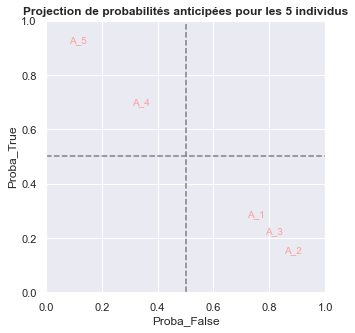

<Figure size 432x288 with 0 Axes>

In [95]:
#Projection de probabilités prédites des 5 individus

fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(0,1)    #même limites en abscisse
axes.set_ylim(0,1)    #et en ordonnée

#placement des étiquettes des observations
for i in range(5):
        plt.annotate(df['ID'][i],(df["Proba_False"][i],df["Proba_True"][i]), fontsize= 10, color= "r")
        
plt.plot([0, 1], [0.5, 0.5], color='grey', ls='--')
plt.plot([0.5, 0.5], [0, 1], color='grey', ls='--')

plt.xlabel("Proba_False")
plt.ylabel("Proba_True")
plt.title("Projection de probabilités anticipées pour les 5 individus", fontsize= 12, fontweight='bold')
plt.show()
plt.savefig('M4 case_predictions_vis1.jpg')

In [379]:
#End